1. ID number
2. Diagnosis (M = malignant, B = benign)
3. 32

Ten real-valued features are computed for each cell nucleus:

4. radius (mean of distances from center to points on the perimeter)
5. texture (standard deviation of gray-scale values)
6. perimeter
8. area
9. smoothness (local variation in radius lengths)
10. compactness (perimeter^2 / area - 1.0)
11. concavity (severity of concave portions of the contour)
12. concave points (number of concave portions of the contour)
13. symmetry
14. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
#loading dataset
breast_df = pd.read_csv('data.csv')
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_df.shape

(569, 33)

In [3]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [87]:
breast_df['compactness_worst'].min()

0.02729

In [4]:
breast_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Exploratory Data Analysis and Visualization

In [5]:
breast_df = breast_df.drop(columns = ['id','Unnamed: 32'])

In [6]:
import pandas as pd
import seaborn as sns
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)


Pandas version: 2.2.2
Seaborn version: 0.13.2


In [7]:
print("Seaborn version:", sns.__version__)

Seaborn version: 0.13.2


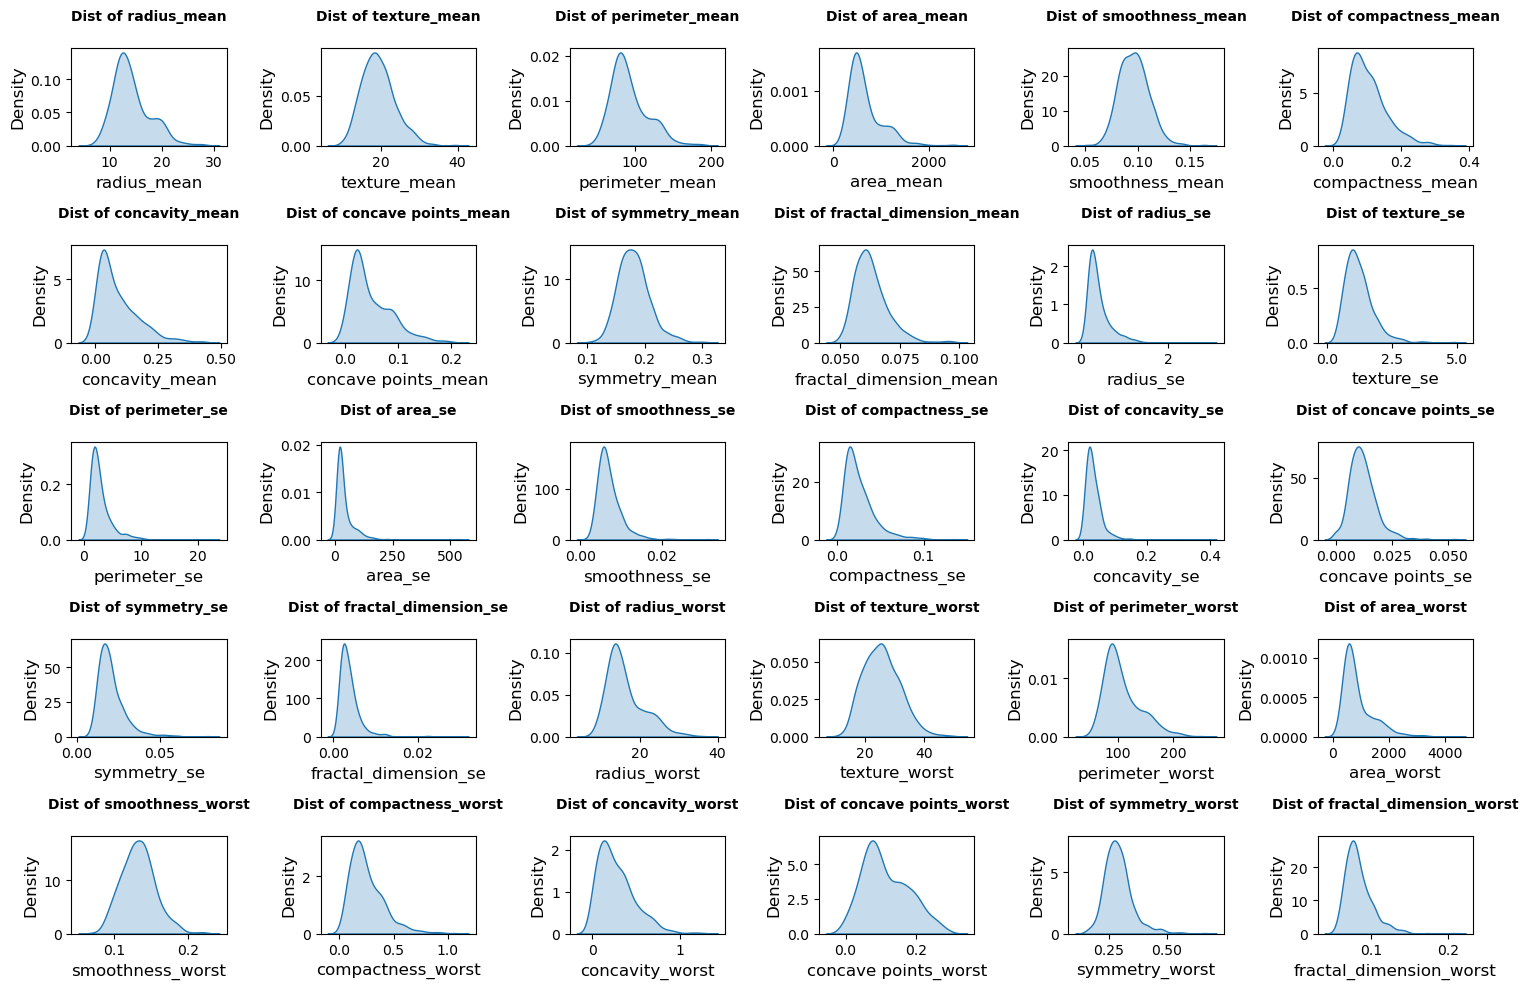

In [8]:
#visualizing with pairplot
num_cols = breast_df.select_dtypes(include = ('int64','float64'))
plotnumber = 1
plt.figure(figsize=(15,10))
for col in num_cols:
    if plotnumber <= 30:
        ax = plt.subplot(5,6,plotnumber)
        sns.kdeplot(breast_df[col], fill = True,)
        plt.title(f'Dist of {col}', fontsize=10, fontweight = 'bold', pad = 20)
        plt.xlabel(col,fontsize = 12)
        plt.ylabel('Density', fontsize = 12)
        
        plotnumber += 1
        
plt.tight_layout()
       

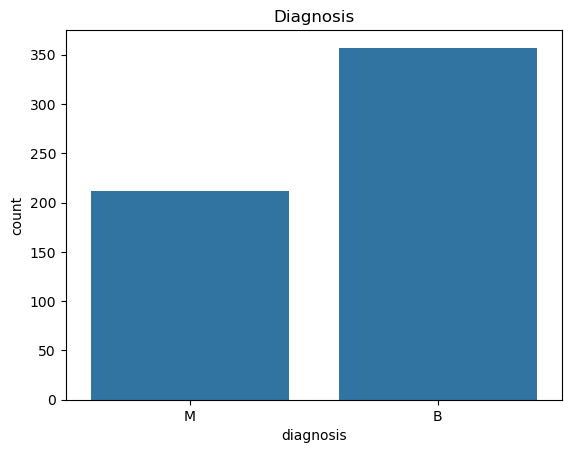

In [9]:
#checking the target variable
sns.countplot(x='diagnosis', data = breast_df)
plt.title('Diagnosis');

In [10]:
#checking correlation
corr_matrix = num_cols.corr()
n = corr_matrix.shape[0]
mask = pd.DataFrame(True, index = corr_matrix.index, columns = corr_matrix.columns)
mask.values[np.tril_indices_from(mask)] = False

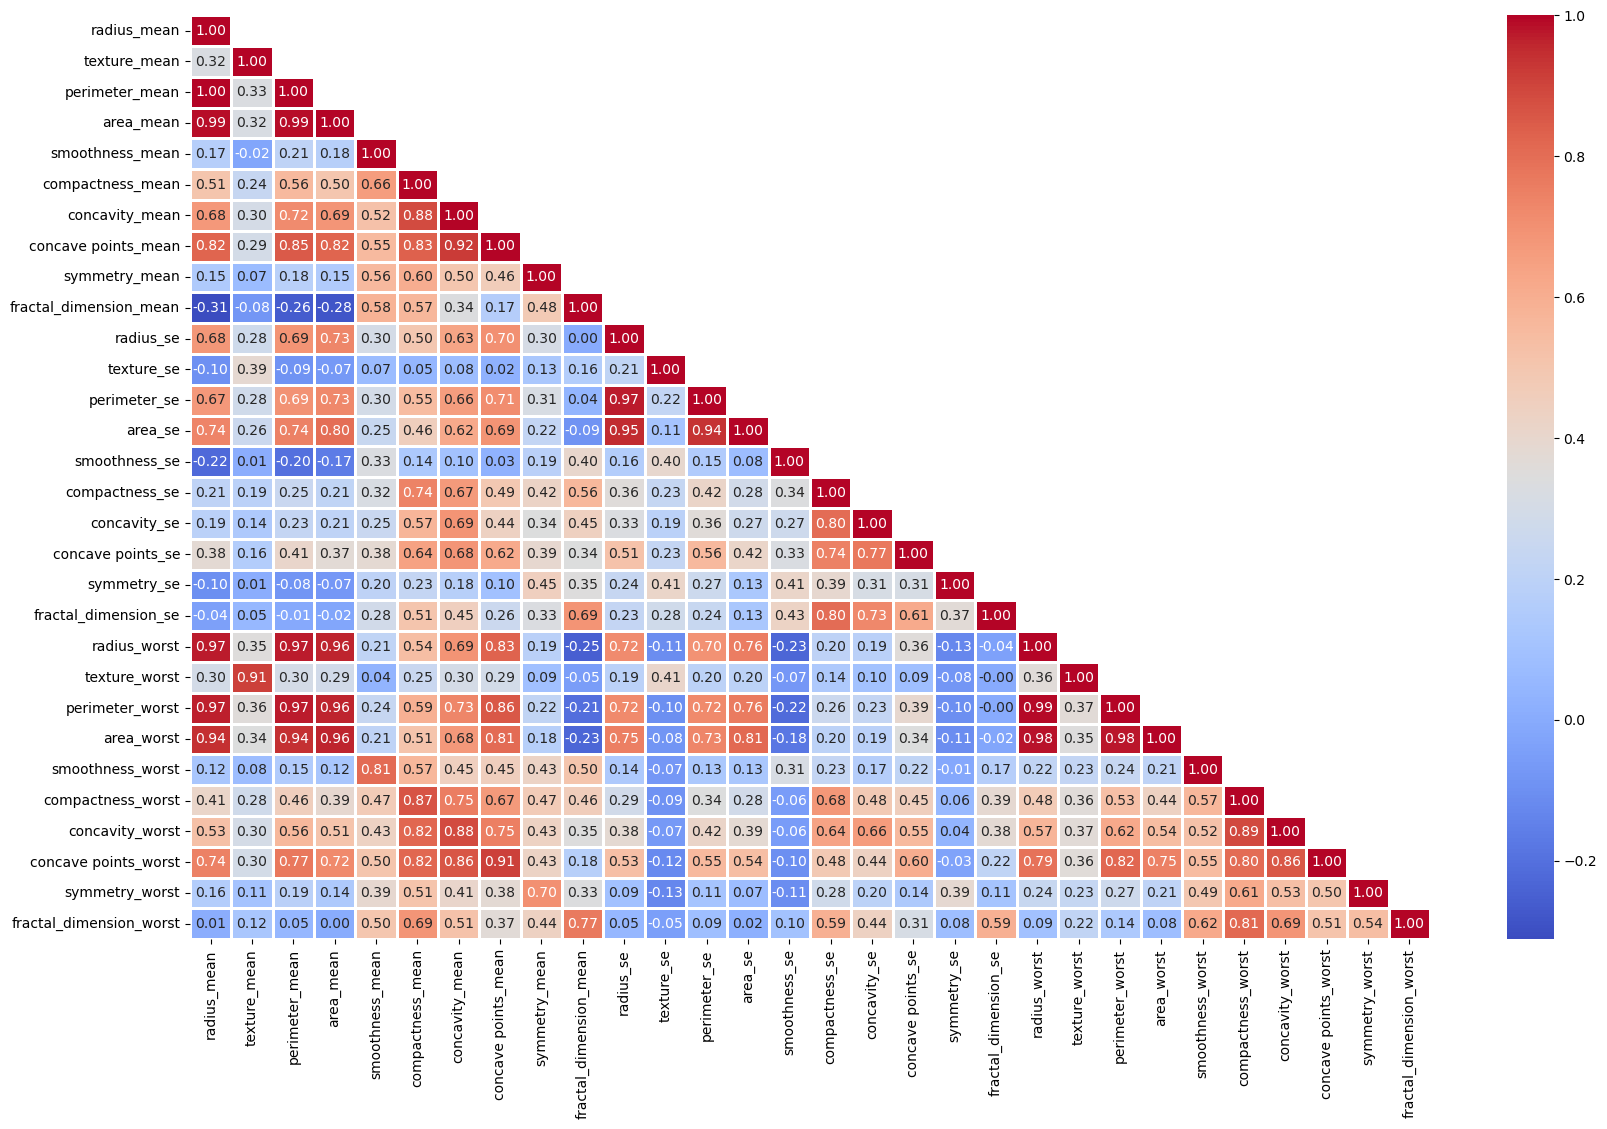

In [11]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap="coolwarm", ax = ax);

#### Data preprocessing and model evaluation

In [12]:
X = breast_df.drop('diagnosis', axis = 1)
y = breast_df['diagnosis']

In [13]:
#reducing num of features for X
corr = X.corr().abs()  # Get absolute correlation values
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop the highly correlated features
X_reduced = X.drop(columns=to_drop)


In [14]:
X_reduced.shape

(569, 20)

In [16]:
X_reduced.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split 
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced,y, 
                                   random_state=42,  
                                   test_size=0.2) 

In [18]:
#label encoding of the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [20]:
#scaling the X features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_reduced_train)
X_test = scaler.transform(X_reduced_test)

#### Choosing Individual models
To aid in the breast detection diagnosis, 6 different models will be used. They are; Logistic Regression, KNN Classifier, Gradient Boost, Decision Tree Classifier, XGBoost, Random Forest Classifier

In [21]:
#importing neccesary models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [22]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train_encoded)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score, classification_report
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_m = confusion_matrix(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
    
print("Prediction Accuracy:", accuracy)
print("Confusion Matrix:", conf_m)
print(f'Precision: {precision:.2f}') 
print(f'Recall: {recall:.2f}')     

Prediction Accuracy: 0.9736842105263158
Confusion Matrix: [[69  2]
 [ 1 42]]
Precision: 0.95
Recall: 0.98


In [25]:
#K Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train_encoded)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)

# Print the results
print("Prediction Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print(f'Precision: {precision:.2f}') 
print(f'Recall: {recall:.2f}')     
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


Prediction Accuracy: 0.9210526315789473
Confusion Matrix:
 [[67  4]
 [ 5 38]]
Precision: 0.90
Recall: 0.88
Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.94      0.94        71
           M       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [27]:
#Gradient Boosting Classifier with hyperparameters
gr=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

#Fitting train data to GBC
gr.fit(X_train,y_train_encoded)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [28]:
y_pred = gr.predict(X_test)
# Confusion matrix to give number of correct and incorrect classifications
print(confusion_matrix(y_test_encoded, y_pred))
#accuracy score
gr_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Gradient Boost accuracy is %2.2f" % gr_accuracy)
print(classification_report(y_test_encoded, y_pred))

[[69  2]
 [ 2 41]]
Gradient Boost accuracy is 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [29]:
#Gradient Boost model showed the best accuracy however for learning purpose it was be improved with parameter tuning 
#This will be done by tuning n-estimators and learning rate
from sklearn.model_selection import GridSearchCV
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),
}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train_encoded)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test_encoded))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.966988821611551
Test Score: 0.9736842105263158


In [30]:
#random forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=5, n_estimators=100, oob_score=True)
#Fitting train data to rf classifier
rf.fit(X_train,y_train_encoded)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [31]:
y_pred = rf.predict(X_test)
#accuracy score
rf_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Random Forest accuracy is %2.2f" % gr_accuracy)
print(confusion_matrix(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

Random Forest accuracy is 0.96
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
feature_names = X_reduced.columns

In [33]:
#feature importance
#Extracting feature importances
importances = rf.feature_importances_

# Pairing feature importances with feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
0               radius_mean    0.216951
17          concavity_worst    0.167293
4            concavity_mean    0.149119
7                 radius_se    0.081542
16        compactness_worst    0.071657
3          compactness_mean    0.052522
1              texture_mean    0.046449
18           symmetry_worst    0.031240
11             concavity_se    0.027636
14     fractal_dimension_se    0.023439
6    fractal_dimension_mean    0.020423
15         smoothness_worst    0.020013
10           compactness_se    0.016073
2           smoothness_mean    0.014500
12        concave points_se    0.013034
13              symmetry_se    0.010987
9             smoothness_se    0.010781
8                texture_se    0.009832
19  fractal_dimension_worst    0.009182
5             symmetry_mean    0.007326


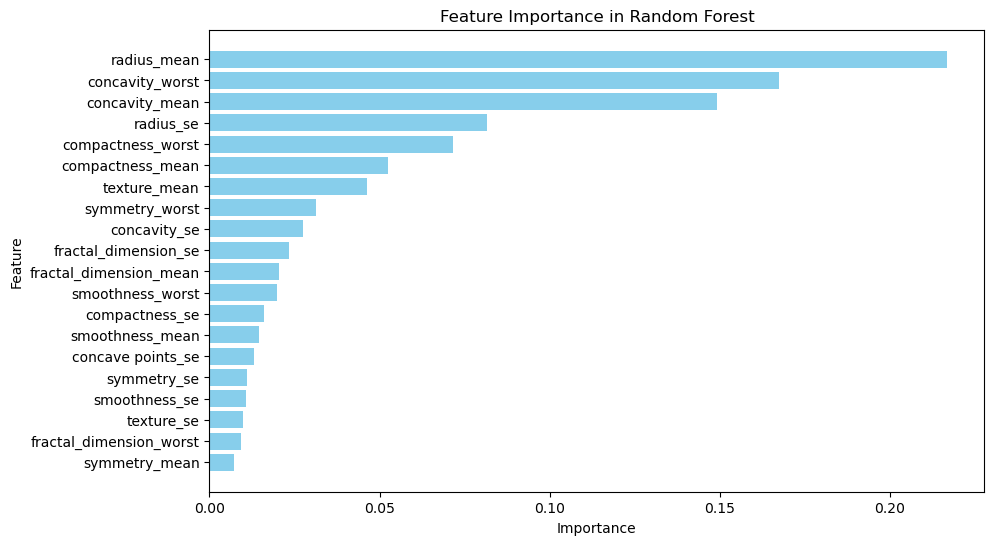

In [34]:
# visualizing the important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top

C:\Users\Dr Afolabi\AppData\Local\Temp\ipykernel_14316\1648004937.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


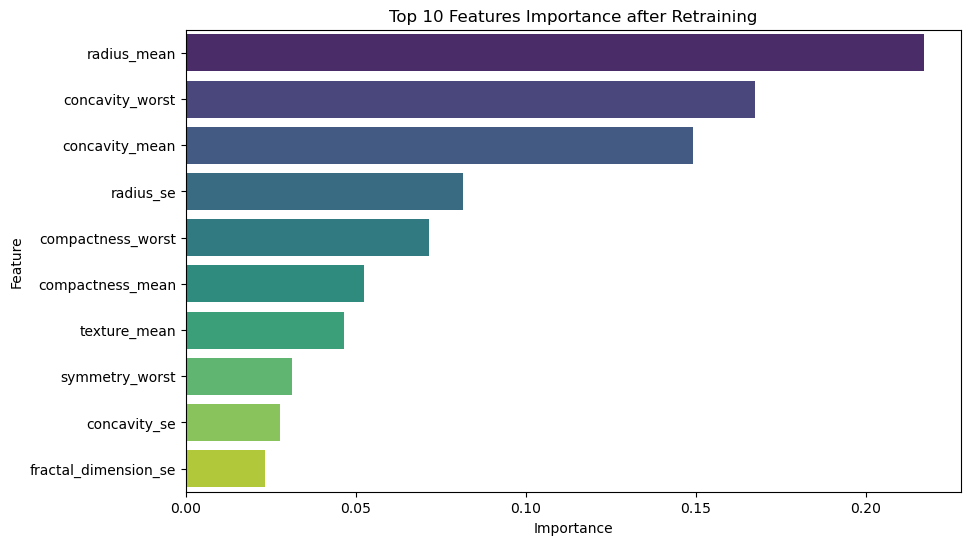

In [36]:
#creating a feature importance data frame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sorting the DataFrame by importance to get the top features
top_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Getting the top 10 features and their importances
top_10_features = top_importance_df.head(10)

# Create a bar plot for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Features Importance after Retraining')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [39]:
top_10_features

,Feature,Importance
0,radius_mean,0.216951
17,concavity_worst,0.167293
4,concavity_mean,0.149119
7,radius_se,0.081542
16,compactness_worst,0.071657
3,compactness_mean,0.052522
1,texture_mean,0.046449
18,symmetry_worst,0.031240
11,concavity_se,0.027636
14,fractal_dimension_se,0.023439


In [40]:
#XG Boost
xgb = XGBClassifier()
#Fitting train data to xg boost
xgb.fit(X_train,y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)

# Accuracy Score
xgb_accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

#confusion matrix
xgb_conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(xgb_conf_matrix)

# Classification report
class_report = classification_report(y_test_encoded, y_pred)
print("Classification Report:")
print(class_report)

XGBoost Accuracy: 0.9737
Confusion Matrix:
[[69  2]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [73]:
#feature importance using Xg boost
#from xgboost import plot_importance

# Plot feature importance
#plt.figure(figsize=(10, 8))
#plot_importance(xgb, max_num_features=10)  # Shows top 10 important features
#plt.title('Feature Importance')
#plt.show();

### Model Deployment
For model deployment, I will be using Random Forest Classifier while choosing the top 10 best features due to the in built feature importance it has 

In [42]:
import pickle

In [43]:
filename = 'trained_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [44]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))